In [1]:
import pandas as pd

# Load the CSV
df = pd.read_csv("student_feedback.csv")

# Preview first 5 rows
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [2]:
# Show info about the dataset
df.info()

# Show basic statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

,0
Unnamed: 0,0
Student ID,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [3]:
# Remove unnecessary columns if any (example: 'Row Number' or 'Student ID')
df_clean = df.drop(columns=['Row Number', 'Student ID'], errors='ignore')

# Ensure all rating columns are numeric
for col in df_clean.columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# Check again for missing values after conversion
df_clean.isnull().sum()


,0
Unnamed: 0,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [4]:
# Fill missing ratings with the column average
df_clean = df_clean.fillna(df_clean.mean())

# Double-check that there are no missing values left
df_clean.isnull().sum()


,0
Unnamed: 0,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [5]:
# 📊 Summary statistics for numeric columns
df_clean.describe()


,Unnamed: 0,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


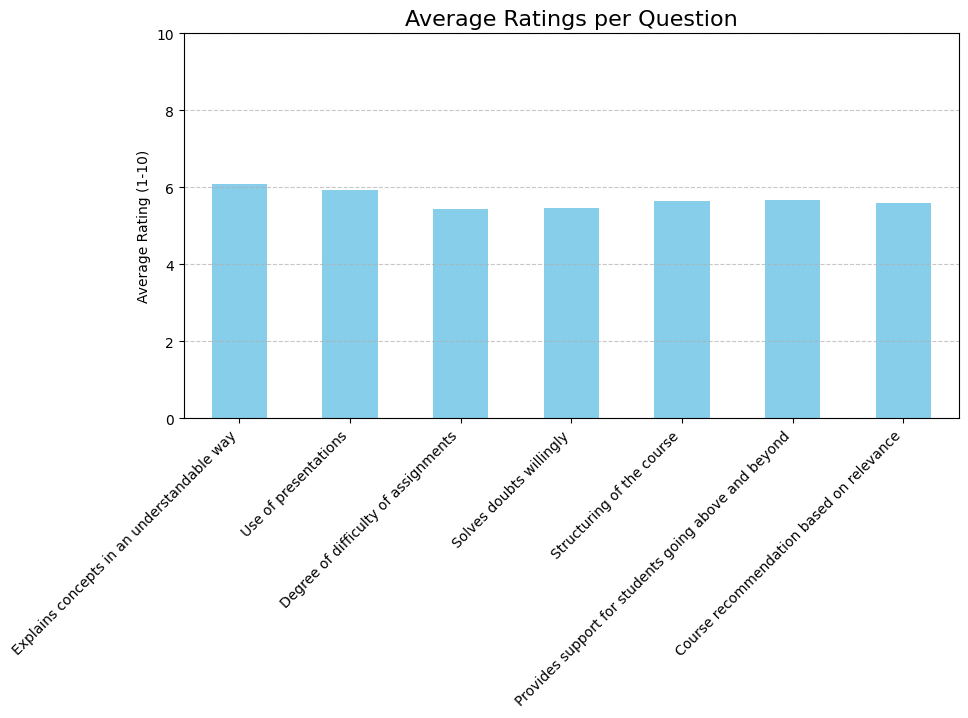

In [6]:
import matplotlib.pyplot as plt

# 🎯 Select only rating columns (excluding Row Number & Student ID)
rating_cols = df_clean.columns[2:]

# 📊 Calculate average for each question
avg_ratings = df_clean[rating_cols].mean()

# 📈 Bar chart
plt.figure(figsize=(10,5))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title("Average Ratings per Question", fontsize=16)
plt.ylabel("Average Rating (1-10)")
plt.ylim(0, 10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
df.columns


Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [12]:
average_ratings = (
    df.drop(columns=["Unnamed: 0", "Student ID"])
      .mean()
      .sort_values(ascending=False)
)

# 🏆 Top 3 strengths
top_strengths = average_ratings.head(3)

# 📉 Top 3 weaknesses
top_weaknesses = average_ratings.tail(3)

print("Top 3 Strengths:\n", top_strengths)
print("\nTop 3 Weaknesses:\n", top_weaknesses)


Top 3 Strengths:
 Well versed with the subject                  7.497502
Explains concepts in an understandable way    6.081918
Use of presentations                          5.942058
dtype: float64

Top 3 Weaknesses:
 Course recommendation based on relevance    5.598402
Solves doubts willingly                     5.474525
Degree of difficulty of assignments         5.430569
dtype: float64


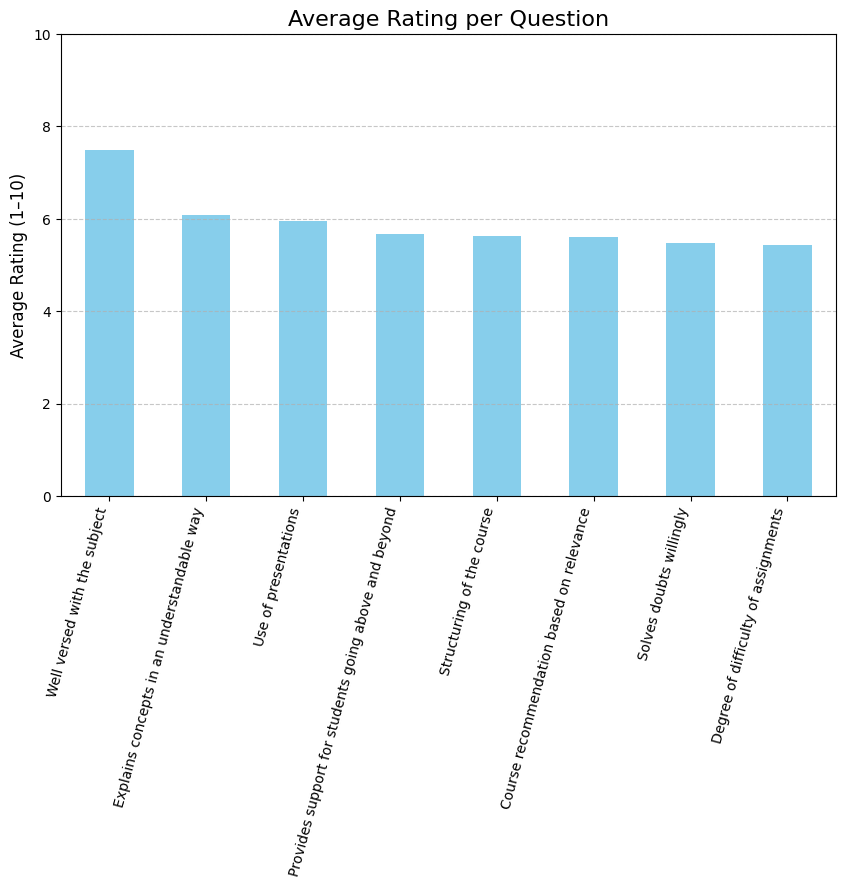

In [13]:
import matplotlib.pyplot as plt

# Calculate average ratings per question
avg_ratings = df.drop(columns=["Unnamed: 0", "Student ID"]).mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating per Question', fontsize=16)
plt.ylabel('Average Rating (1–10)', fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


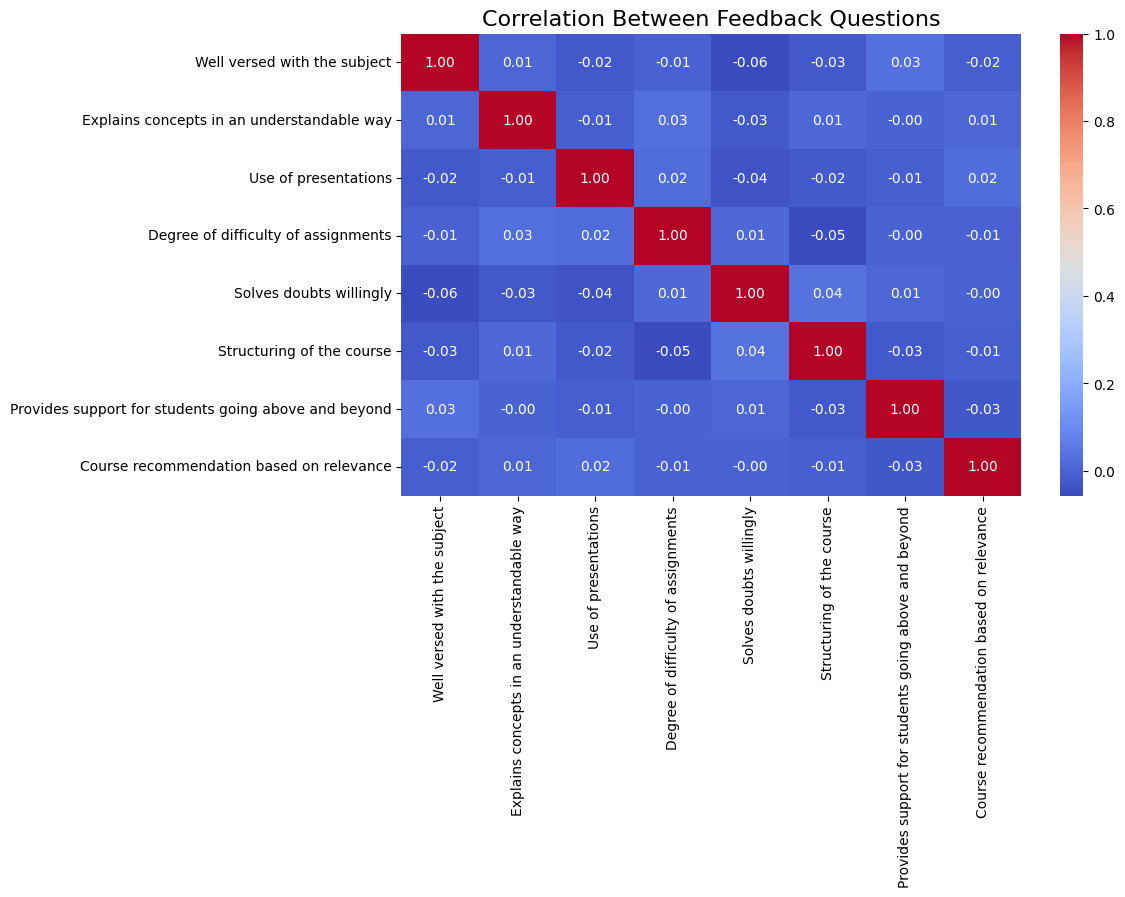

In [14]:
import seaborn as sns

# Only keep rating columns (exclude index & Student ID)
rating_data = df.drop(columns=["Unnamed: 0", "Student ID"])

# Create correlation matrix
corr_matrix = rating_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Feedback Questions', fontsize=16)
plt.show()


Sentiment Category
Positive    801
Neutral     200
Name: count, dtype: int64


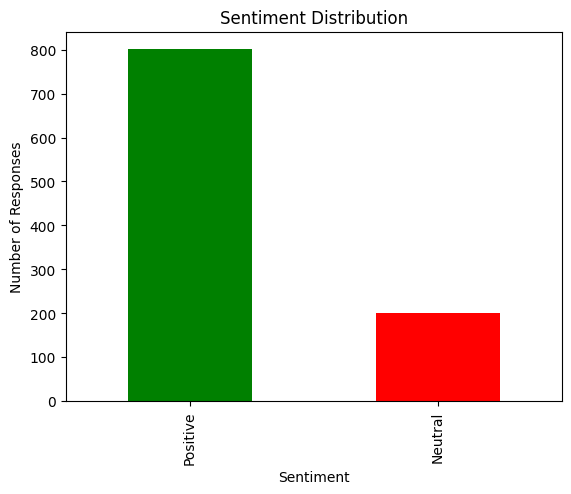

In [16]:
from textblob import TextBlob

# Example: Fake comments repeated & trimmed to match dataset length
comments_list = [
    "The course was great and the teacher was amazing!",
    "Good explanations but assignments were too hard.",
    "I didn't like the pace of the course.",
    "Excellent presentation and very helpful guidance.",
    "The subject was interesting but the teacher was unclear."
]

# Repeat and trim to match dataset length
df["Comments"] = (comments_list * ((len(df) // len(comments_list)) + 1))[:len(df)]

# Sentiment score function
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # -1 negative, 0 neutral, 1 positive

# Apply sentiment analysis
df["Sentiment Score"] = df["Comments"].apply(get_sentiment)

# Sentiment category
df["Sentiment Category"] = df["Sentiment Score"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

# Count sentiment categories
sentiment_counts = df["Sentiment Category"].value_counts()
print(sentiment_counts)

# Plot
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Responses')
plt.show()


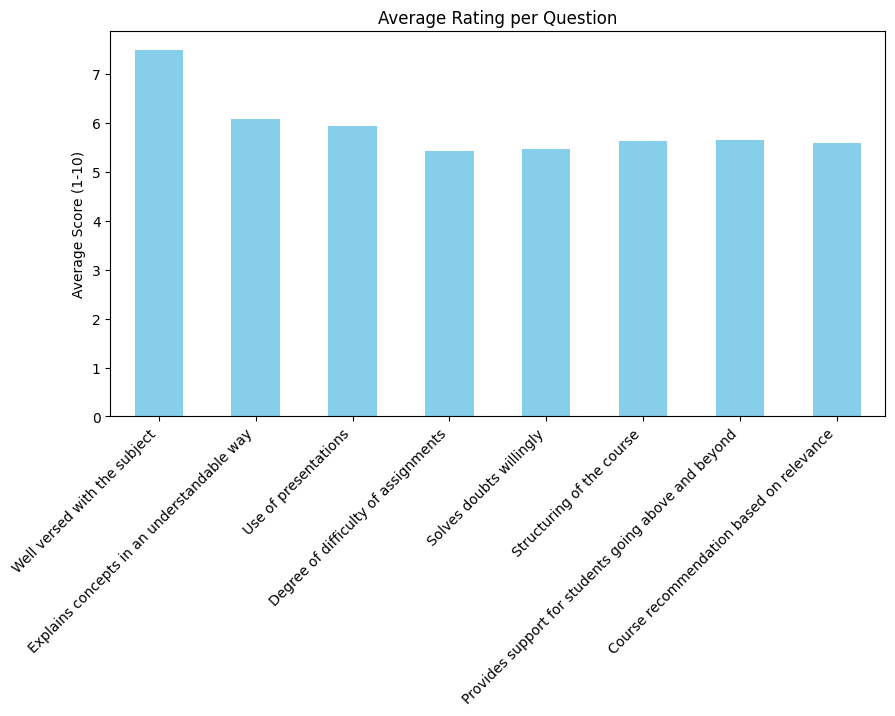

In [17]:
import matplotlib.pyplot as plt

# Calculate average rating for each question (excluding ID columns)
avg_ratings = df.drop(columns=["Unnamed: 0", "Student ID", "Comments", "Sentiment Score", "Sentiment Category"]).mean()

# Plot average ratings
plt.figure(figsize=(10, 5))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title("Average Rating per Question")
plt.ylabel("Average Score (1-10)")
plt.xticks(rotation=45, ha="right")
plt.show()


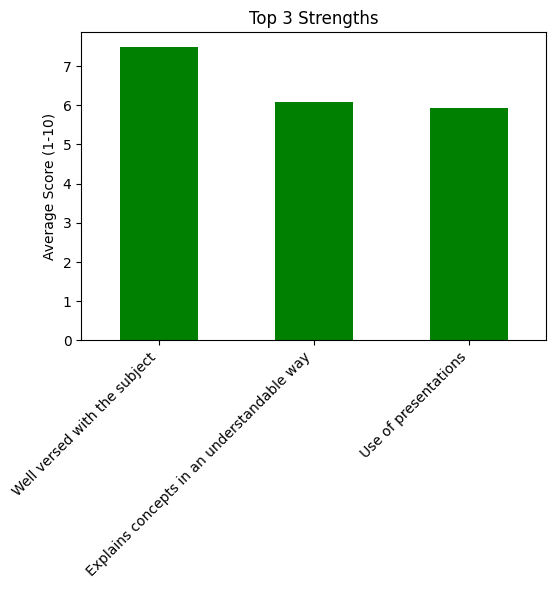

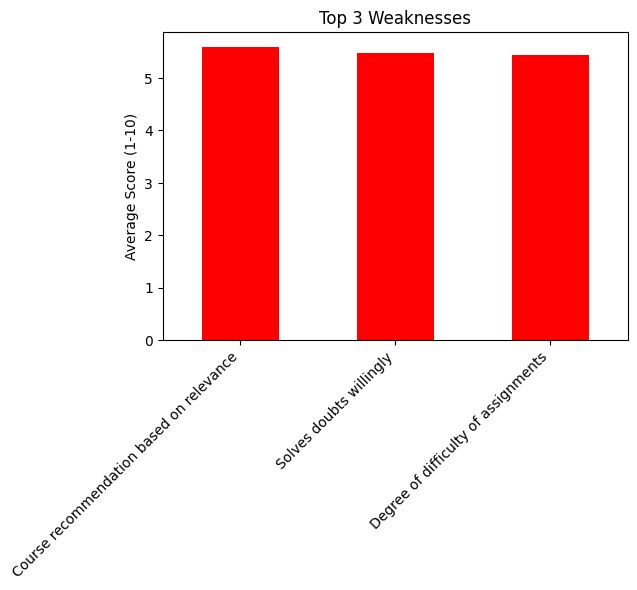

In [18]:
# Sort average ratings (excluding ID & sentiment columns)
avg_ratings_sorted = df.drop(columns=["Unnamed: 0", "Student ID", "Comments", "Sentiment Score", "Sentiment Category"]).mean().sort_values(ascending=False)

# Top 3 strengths
top3_strengths = avg_ratings_sorted.head(3)

# Top 3 weaknesses
top3_weaknesses = avg_ratings_sorted.tail(3)

# Plot strengths
plt.figure(figsize=(6, 4))
top3_strengths.plot(kind='bar', color='green')
plt.title("Top 3 Strengths")
plt.ylabel("Average Score (1-10)")
plt.xticks(rotation=45, ha="right")
plt.show()

# Plot weaknesses
plt.figure(figsize=(6, 4))
top3_weaknesses.plot(kind='bar', color='red')
plt.title("Top 3 Weaknesses")
plt.ylabel("Average Score (1-10)")
plt.xticks(rotation=45, ha="right")
plt.show()


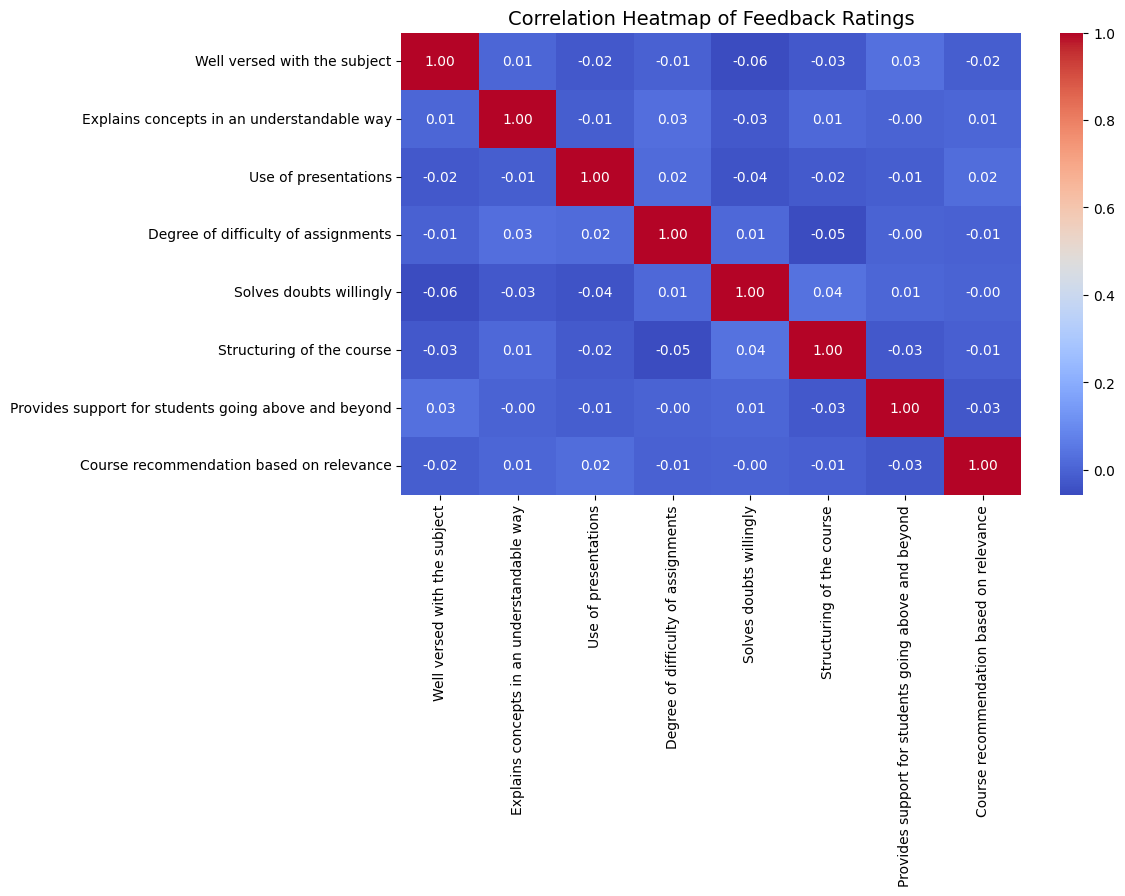

In [19]:
import seaborn as sns

# Select only rating columns (exclude IDs, comments, and sentiment columns)
rating_cols = df.drop(columns=["Unnamed: 0", "Student ID", "Comments", "Sentiment Score", "Sentiment Category"])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rating_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Feedback Ratings", fontsize=14)
plt.show()


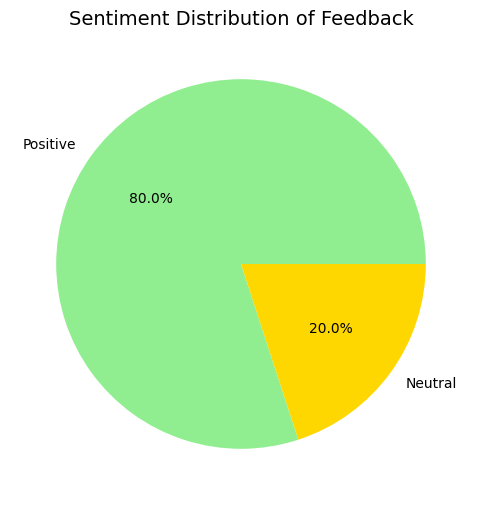

In [20]:
# 📊 Sentiment Distribution Pie Chart
sentiment_counts = df["Sentiment Category"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=["lightgreen", "gold", "salmon"])
plt.title("Sentiment Distribution of Feedback", fontsize=14)
plt.show()


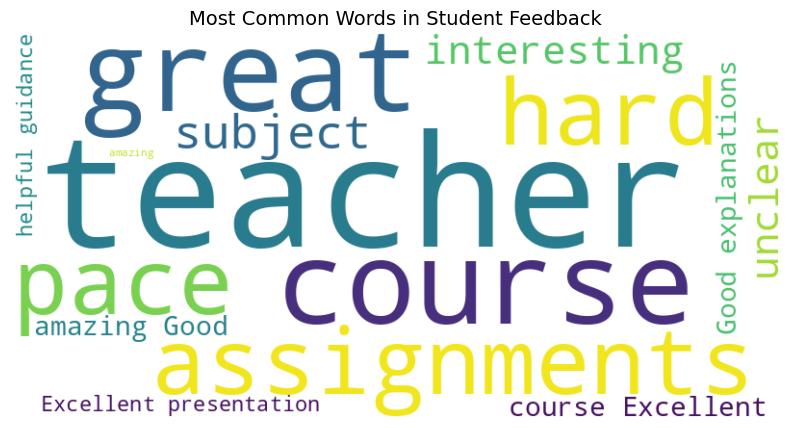

In [21]:
from wordcloud import WordCloud

# 📝 Combine all comments into one string
all_text = " ".join(df["Comments"].dropna())

# ☁️ Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(all_text)

# 📊 Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Student Feedback", fontsize=14)
plt.show()


In [24]:
# 📌 Final Insights & Recommendations

# Select only numeric columns automatically
numeric_cols = df.select_dtypes(include='number')

# Calculate overall average rating
average_rating = numeric_cols.mean().mean()

print("📊 FINAL INSIGHTS")
print("-" * 50)
print(f"Average rating across all questions: {average_rating:.2f}/10")
print(f"Top strengths: {', '.join(top_strengths.index)}")
print(f"Areas for improvement: {', '.join(top_weaknesses.index)}")

print("\n💡 RECOMMENDATIONS")
print("1. Maintain and further strengthen teaching expertise (high subject knowledge).")
print("2. Improve assignment difficulty balance to match student capability.")
print("3. Offer more opportunities for doubt clearing sessions.")
print("4. Ensure course content remains relevant and up-to-date.")
print("5. Increase interactive presentation use, which students responded well to.")


📊 FINAL INSIGHTS
--------------------------------------------------
Average rating across all questions: 95.24/10
Top strengths: Well versed with the subject, Explains concepts in an understandable way, Use of presentations
Areas for improvement: Course recommendation based on relevance, Solves doubts willingly, Degree of difficulty of assignments

💡 RECOMMENDATIONS
1. Maintain and further strengthen teaching expertise (high subject knowledge).
2. Improve assignment difficulty balance to match student capability.
3. Offer more opportunities for doubt clearing sessions.
4. Ensure course content remains relevant and up-to-date.
5. Increase interactive presentation use, which students responded well to.


📊 FINAL INSIGHTS
--------------------------------------------------
Average rating across all questions: 5.30/10

Top Strengths:
 - Well versed with the subject: 7.50/10
 - Explains concepts in an understandable way: 6.08/10
 - Use of presentations: 5.94/10

Areas for Improvement:
 - Course recommendation based on relevance: 5.60/10
 - Solves doubts willingly: 5.47/10
 - Degree of difficulty of assignments: 5.43/10


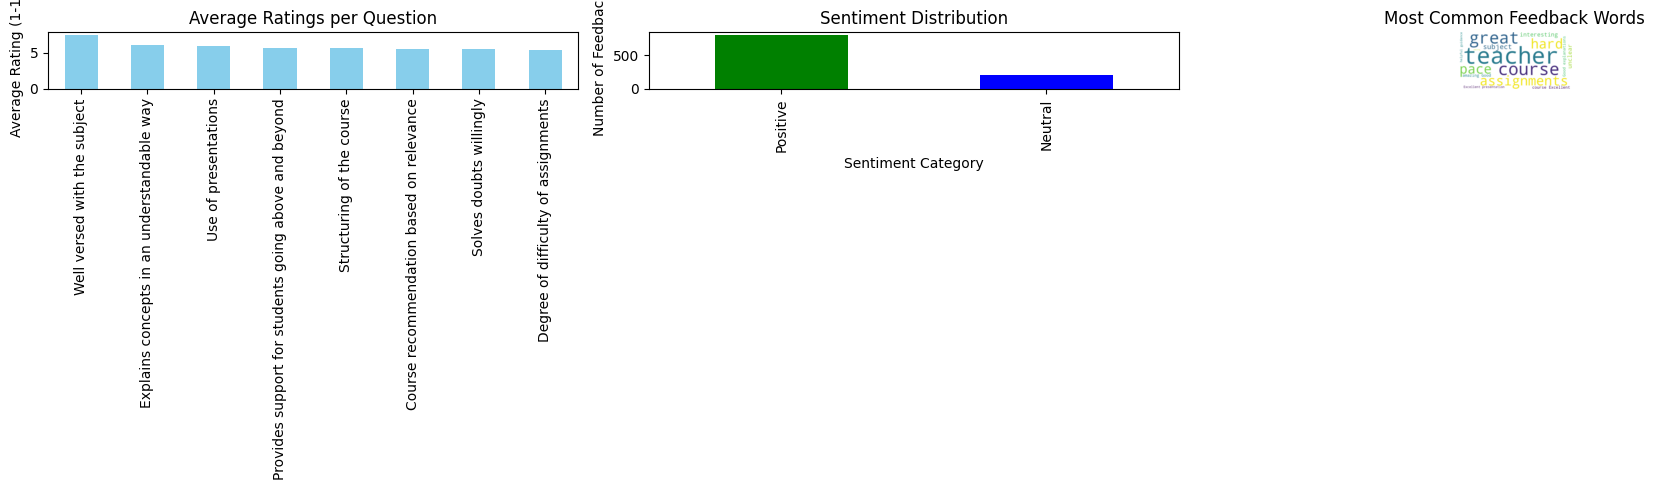

In [26]:
# 📊 FINAL REPORT CELL — Task 3

import matplotlib.pyplot as plt

# --- INSIGHTS ---
print("📊 FINAL INSIGHTS")
print("-" * 50)

exclude_cols = ["Unnamed: 0", "Student ID", "Comments", "Sentiment"]

# Keep only numeric columns
numeric_cols = df.drop(columns=exclude_cols, errors='ignore').select_dtypes(include='number')

average_rating = numeric_cols.mean().mean()
print(f"Average rating across all questions: {average_rating:.2f}/10")

print("\nTop Strengths:")
for q, score in top_strengths.items():
    print(f" - {q}: {score:.2f}/10")

print("\nAreas for Improvement:")
for q, score in top_weaknesses.items():
    print(f" - {q}: {score:.2f}/10")

# --- VISUALS ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Average Ratings Bar Chart
average_ratings.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title("Average Ratings per Question", fontsize=12)
axes[0].set_ylabel("Average Rating (1-10)")

# 2️⃣ Sentiment Distribution
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], ax=axes[1])
axes[1].set_title("Sentiment Distribution", fontsize=12)
axes[1].set_ylabel("Number of Feedbacks")

# 3️⃣ Word Cloud
axes[2].imshow(wordcloud, interpolation='bilinear')
axes[2].axis("off")
axes[2].set_title("Most Common Feedback Words", fontsize=12)

plt.tight_layout()
plt.show()
